In [1]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns',500)

In [2]:
fifa_dataset = pd.read_csv("data.csv") #reads the dataset
fifa_dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
print(fifa_dataset.size)
print(fifa_dataset.shape)

1620423
(18207, 89)


In [4]:
#fifa_dataset.info() #gives us the information of each column in the dataset and what kinds of vlaues it holds

In [5]:
fifa_dataset.drop(columns=['Unnamed: 0','Name','Photo','Nationality','Flag','Club','Club Logo','Real Face','Joined','Loaned From','Contract Valid Until','Release Clause','Preferred Foot','Weak Foot'],inplace=True)
print(fifa_dataset.size) #we drop the above fields because even without doing any calculaions, these attributes do not contribute to the value field that we want to predict
print(fifa_dataset.shape)

1365525
(18207, 75)


In [6]:
fifa_dataset.columns #after dropping we see the columns again

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Work Rate', 'Body Type',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [7]:
#Some of these attributes like the Value, wage, LS, LM, etc all have string values that can be converted into numerical values
#So we convert them to numerical values

def MK_converter(values): #example take the field of Value, Christiano Ronaldo is worth 77 million pouds. The worth is given with the currency symbol and an M next to the number. So we use that to convert the values
    if values[-1] == 'M':
        worth = values[1:-1]
        worth = float(worth) * 1000000
        return worth
    elif values[-1] == 'K':
        worth = values[1:-1]
        worth = float(worth) * 1000
        return worth
    else:
        return 0
    
fifa_dataset['Value'] = fifa_dataset['Value'].apply(MK_converter)
fifa_dataset['Wage'] = fifa_dataset['Wage'].apply(MK_converter)
#fifa_dataset.describe()

In [8]:
fifa_dataset.fillna(value=0, inplace=True)
fifa_dataset.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110500000.0,565000.0,2202,5.0,4.0,Medium/ Medium,Messi,RF,10.0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77000000.0,405000.0,2228,5.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,118500000.0,290000.0,2143,5.0,5.0,High/ Medium,Neymar,LW,10.0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,72000000.0,260000.0,1471,4.0,1.0,Medium/ Medium,Lean,GK,1.0,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,102000000.0,355000.0,2281,4.0,4.0,High/ High,Normal,RCM,7.0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
#The fields LS, LM, ST etc are the differet positions in a team's formation. The values in the field mean that if you were to score the player's performance in that position, it would be that value
#Example, if you put Christiano Ronaldo as a LS, ST OR RS whihc stands for Left Striker, Striker and Right Striker respectively, then his score will be in the 90's because that is the position he plays
#But if you were to put him in LCB, CB or RCB which stands for Left Center Back, Center Back and Right Center Back, then he will have a very poor score of 47 because he is not trained to play in those postions
#The fields have values of two number with a plus sign, so we add those numbers and make them integers4

def position_adder(x):
    nums = str(x)
    num1 = nums[0:2]
    num2 = nums[-1]
    return int(num1) + int(num2)

positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

for position in positions:
    fifa_dataset[position] = fifa_dataset[position].apply(position_adder)
    
fifa_dataset[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76


In [10]:
# In the dataset we have the player's height is in terms of feet and inches and the weight is in terms of pounds
# The height needs to be converted into centimeters. We do this because using centimeneters tends give a more acuuracte measure
# The weight needs converted into an int and we need to remove the lbs

fifa_dataset[['Height','Weight']].head() #This is the current state of the dataset

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [11]:
def height_to_cm(x):
    t = str(x)
    elements = t.split("'")
    height = elements[0]
    inches = elements[-1]
    
    height = int(height)
    inches = int(inches)
    
    height_in_cm = height*30.48 + inches*2.54
    return height_in_cm

fifa_dataset['Height'] = fifa_dataset['Height'].apply(height_to_cm)
fifa_dataset['Weight'] = fifa_dataset['Weight'].apply(lambda x: str(x).split("lbs")[0])

fifa_dataset[['Height','Weight']].head()

,Height,Weight
0,170.18,159
1,187.96,183
2,175.26,150
3,193.04,168
4,180.34,154


In [12]:
fifa_dataset.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110500000.0,565000.0,2202,5.0,4.0,Medium/ Medium,Messi,RF,10.0,170.18,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77000000.0,405000.0,2228,5.0,5.0,High/ Low,C. Ronaldo,ST,7.0,187.96,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,118500000.0,290000.0,2143,5.0,5.0,High/ Medium,Neymar,LW,10.0,175.26,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,72000000.0,260000.0,1471,4.0,1.0,Medium/ Medium,Lean,GK,1.0,193.04,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,102000000.0,355000.0,2281,4.0,4.0,High/ High,Normal,RCM,7.0,180.34,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [13]:
#The body type attribute has a little inconsistencies. The three types of body types that are aupposed to be in the dataset are Lean, Normal and Stocky
#Some players like Messi and Ronaldo have body types that have the same as their name which does not make sense. So we take these cases and we convert them to the three types
body_types = fifa_dataset['Body Type'].unique() #This is how the data set looks like now
print(body_types)
print(fifa_dataset['Body Type'])

['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa' 0]
0                      Messi
1                 C. Ronaldo
2                     Neymar
3                       Lean
4                     Normal
5                     Normal
6                       Lean
7                     Normal
8                     Normal
9                     Normal
10                    Normal
11                    Normal
12                      Lean
13                    Normal
14                      Lean
15                    Normal
16                    Normal
17                      Lean
18                    Normal
19                  Courtois
20                      Lean
21                      Lean
22                    Normal
23                    Stocky
24                    Normal
25                      Lean
26       PLAYER_BODY_TYPE_25
27                    Normal
28                    Normal
29                    Normal
               

In [14]:
body_type_dict = {"Messi" : "Lean", "C. Ronaldo" : "Normal", "Courtois" : "Lean", "Neymar" : "Lean", "PLAYER_BODY_TYPE_25" : "Normal", "Shaqiri" : "Stocky", "Akinfenwa" : "Stocky", "Normal" : "Normal", "Lean" : "Lean", "Stocky" : "Stocky", 0 : "0" }
fifa_dataset["Body Type"] = [body_type_dict[item] for item in fifa_dataset["Body Type"]] 
print(body_types)

['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa' 0]


In [15]:
fifa_dataset.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110500000.0,565000.0,2202,5.0,4.0,Medium/ Medium,Lean,RF,10.0,170.18,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77000000.0,405000.0,2228,5.0,5.0,High/ Low,Normal,ST,7.0,187.96,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,118500000.0,290000.0,2143,5.0,5.0,High/ Medium,Lean,LW,10.0,175.26,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,72000000.0,260000.0,1471,4.0,1.0,Medium/ Medium,Lean,GK,1.0,193.04,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,102000000.0,355000.0,2281,4.0,4.0,High/ High,Normal,RCM,7.0,180.34,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [16]:
fifa_dataset.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Work Rate', 'Body Type',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [17]:
attack_work_rate = []
defense_work_rate = []

def work_rate_split(x):
    t = str(x)
    elements = t.split("/")
    attack_work_rate.append(elements[0])
    defense_work_rate.append(elements[-1])
    
fifa_dataset['Work Rate'] = fifa_dataset['Work Rate'].apply(work_rate_split)
fifa_dataset.drop('Work Rate', axis=1, inplace=True)
fifa_dataset.insert(13, 'Attack_Work_Rate', attack_work_rate)
fifa_dataset.insert(14, 'Defense_Work_Rate', defense_work_rate)

fifa_dataset.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Body Type', 'Position',
       'Jersey Number', 'Height', 'Attack_Work_Rate', 'Defense_Work_Rate',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [18]:
fifa_dataset = fifa_dataset.rename(index=str, columns={"Body Type": "BodyType"})
fifa_dataset.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Skill Moves,BodyType,Position,Jersey Number,Height,Attack_Work_Rate,Defense_Work_Rate,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110500000.0,565000.0,2202,5.0,4.0,Lean,RF,10.0,170.18,Medium,Medium,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77000000.0,405000.0,2228,5.0,5.0,Normal,ST,7.0,187.96,High,Low,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,118500000.0,290000.0,2143,5.0,5.0,Lean,LW,10.0,175.26,High,Medium,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,72000000.0,260000.0,1471,4.0,1.0,Lean,GK,1.0,193.04,Medium,Medium,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,102000000.0,355000.0,2281,4.0,4.0,Normal,RCM,7.0,180.34,High,High,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [19]:
dictionary = {"BodyType": {"Lean":1, "Normal":2, "Stocky":3}, "Attack_Work_Rate": {"Low":1, "Medium":2, "High":3}}
fifa_dataset.replace(dictionary,inplace=True)

DWR = fifa_dataset.set_index('Defense_Work_Rate').to_dict()
P = fifa_dataset.set_index('Position').to_dict()
print(DWR)
fifa_dataset.head()

{'ID': {' Medium': 246269, ' Low': 237746, ' High': 244677, '0': 232256}, 'Age': {' Medium': 16, ' Low': 33, ' High': 18, '0': 25}, 'Overall': {' Medium': 46, ' Low': 48, ' High': 47, '0': 62}, 'Potential': {' Medium': 66, ' Low': 48, ' High': 69, '0': 66}, 'Value': {' Medium': 60000.0, ' Low': 20000.0, ' High': 70000.0, '0': 325000.0}, 'Wage': {' Medium': 1000.0, ' Low': 1000.0, ' High': 1000.0, '0': 2000.0}, 'Special': {' Medium': 1321, ' Low': 1262, ' High': 1303, '0': 1578}, 'International Reputation': {' Medium': 1.0, ' Low': 1.0, ' High': 1.0, '0': 0.0}, 'Skill Moves': {' Medium': 2.0, ' Low': 2.0, ' High': 2.0, '0': 0.0}, 'BodyType': {' Medium': 1, ' Low': 2, ' High': 1, '0': '0'}, 'Position': {' Medium': 'CM', ' Low': 'CAM', ' High': 'CM', '0': 0}, 'Jersey Number': {' Medium': 33.0, ' Low': 13.0, ' High': 65.0, '0': 0.0}, 'Height': {' Medium': 177.8, ' Low': 175.26, ' High': 167.64000000000001, '0': 0.0}, 'Attack_Work_Rate': {' Medium': 2, ' Low': 2, ' High': 2, '0': '0'}, 'Wei

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Skill Moves,BodyType,Position,Jersey Number,Height,Attack_Work_Rate,Defense_Work_Rate,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110500000.0,565000.0,2202,5.0,4.0,1,RF,10.0,170.18,2,Medium,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77000000.0,405000.0,2228,5.0,5.0,2,ST,7.0,187.96,3,Low,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,118500000.0,290000.0,2143,5.0,5.0,1,LW,10.0,175.26,3,Medium,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,72000000.0,260000.0,1471,4.0,1.0,1,GK,1.0,193.04,2,Medium,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,102000000.0,355000.0,2281,4.0,4.0,2,RCM,7.0,180.34,3,High,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [20]:
#fifa_dataset.astype(int)
def_work_rate = fifa_dataset['Defense_Work_Rate'].unique()
defdict = dict(zip(def_work_rate, range(len(def_work_rate))))
position = fifa_dataset['Position'].unique()
positiondict = dict(zip(position, range(len(position))))
fifa_dataset['Defense_Work_Rate'] = [defdict[item] for item in fifa_dataset['Defense_Work_Rate'] ]
fifa_dataset['Position'] = [positiondict[item] for item in fifa_dataset['Position'] ]
fifa_dataset = fifa_dataset.apply(pd.to_numeric)
datatypes = fifa_dataset.dtypes
display(datatypes)


ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
International Reputation    float64
Skill Moves                 float64
BodyType                      int64
Position                      int64
Jersey Number               float64
Height                      float64
Attack_Work_Rate              int64
Defense_Work_Rate             int64
Weight                        int64
LS                            int64
ST                            int64
RS                            int64
LW                            int64
LF                            int64
CF                            int64
RF                            int64
RW                            int64
LAM                           int64
CAM                           int64
RAM                           int64
LM                          

In [21]:
print(fifa_dataset.head())
print(fifa_dataset['Potential'])

corr = st.spearmanr(fifa_dataset, fifa_dataset['Potential'])
print(corr)

       ID  Age  Overall  Potential        Value      Wage  Special  \
0  158023   31       94         94  110500000.0  565000.0     2202   
1   20801   33       94         94   77000000.0  405000.0     2228   
2  190871   26       92         93  118500000.0  290000.0     2143   
3  193080   27       91         93   72000000.0  260000.0     1471   
4  192985   27       91         92  102000000.0  355000.0     2281   

   International Reputation  Skill Moves  BodyType  Position  Jersey Number  \
0                       5.0          4.0         1         0           10.0   
1                       5.0          5.0         2         1            7.0   
2                       5.0          5.0         1         2           10.0   
3                       4.0          1.0         1         3            1.0   
4                       4.0          4.0         2         4            7.0   

   Height  Attack_Work_Rate  Defense_Work_Rate  Weight  LS  ST  RS  LW  LF  \
0  170.18                 

In [22]:
#model = LogisticRegression(max_iter=1000, solver='sag') #wrapper method dimensionality reduction
#rmodel = RFE(model, 50)                             #ended up not using because runtime over 20 min just to complete
#x = fifa_dataset.drop('Potential', axis = 1)
#fit = rmodel.fit(x, fifa_dataset['Potential'])
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))

In [71]:
x = fifa_dataset.drop('Potential', axis = 1) #filter method dimension reduction, get independednt features
print(x.shape)
x_train, x_test, y_train, y_test = train_test_split( x, fifa_dataset['Potential'], test_size=0.33)
mod = SelectKBest(score_func=chi2, k=75) #create model that selects the k best features
fitmod = mod.fit(x_train, y_train) #get k best features
mask = fitmod.get_support()
fifa_new = x_train.columns[mask]
x_train = x_train[fifa_new] #create new dataframe with just the k best features
x_test = x_test[fifa_new]
print(fifa_new)
r = LinearRegression().fit(x_train, y_train)
pred = r.predict(x_test)
cols = x.columns.tolist()
print (cols)

print(r2_score(y_test,pred))

(18207, 75)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
#k = 40 0.5002951968538762
#k = 50 0.6308124517039122
#k = 55 0.6325438340038563
#k = 60 0.6276749508561131
#k = 64 0.6365927743206294
#k = 65 0.8440349486580223 0.848066805380419
#k = 66 0.8442822779028599
#k = 70 0.8429455475026931
#k = 75 0.8478259891144257 0.8456986397104773


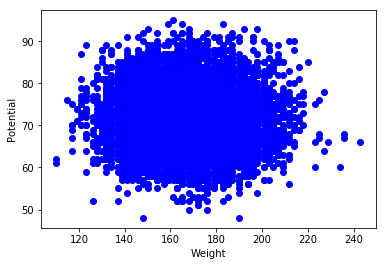

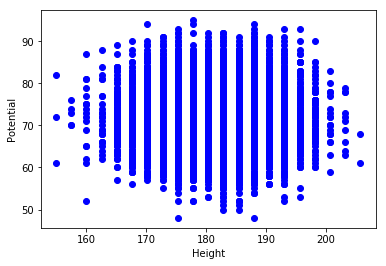

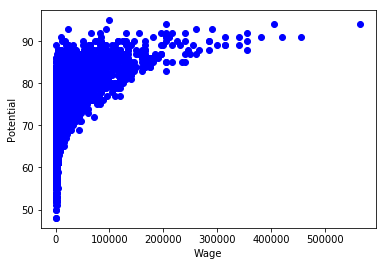

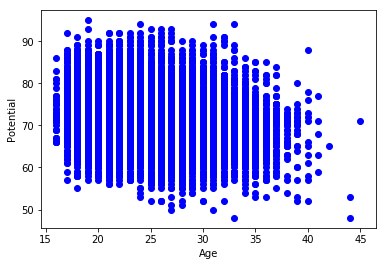

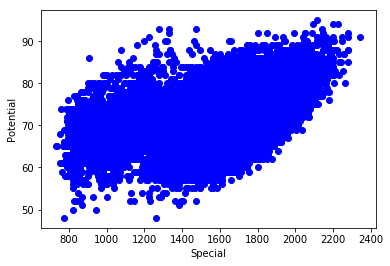

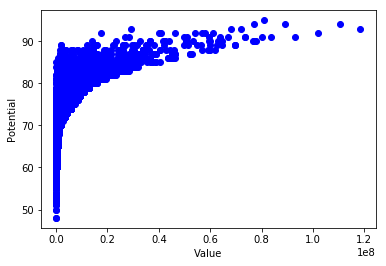

In [79]:
x['Weight'] = x['Weight'].replace(0.0, np.nan)
x['Height'] = x['Height'].replace(0.0, np.nan)
x['Wage'] = x['Wage'].replace(0.0, np.nan)
plt.plot(x['Weight'], fifa_dataset['Potential'], 'bo')

  
# naming the x axis 
plt.xlabel('Weight') 
# naming the y axis 
plt.ylabel('Potential')  
plt.show() 
plt.plot(x['Height'], fifa_dataset['Potential'], 'bo')

# naming the x axis 
plt.xlabel('Height') 
# naming the y axis 
plt.ylabel('Potential')  
plt.show() 
plt.plot(x['Wage'], fifa_dataset['Potential'], 'bo')

  
# naming the x axis 
plt.xlabel('Wage') 
# naming the y axis 
plt.ylabel('Potential')  
plt.show() 
plt.plot(x['Age'], fifa_dataset['Potential'], 'bo')

# naming the x axis 
plt.xlabel('Age') 
# naming the y axis 
plt.ylabel('Potential')  
plt.show() 

plt.plot(x['Special'], fifa_dataset['Potential'], 'bo')

# naming the x axis 
plt.xlabel('Special') 
# naming the y axis 
plt.ylabel('Potential')  
plt.show() 
plt.plot(x['Value'], fifa_dataset['Potential'], 'bo')

# naming the x axis 
plt.xlabel('Value') 
# naming the y axis 
plt.ylabel('Potential')  
plt.show() 

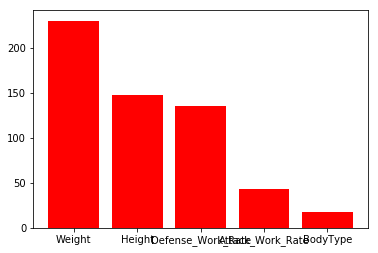

In [38]:
ind = np.argsort(fitmod.scores_)[::-1]

feat = []
for i in range(70, 75):
    feat.append(x.columns[ind[i]])

plt.figure()
plt.bar(feat, fitmod.scores_[ind[range(70, 75)]], color='r', align='center')
plt.show()

AttributeError: 'FigureManagerBase' object has no attribute 'frame'

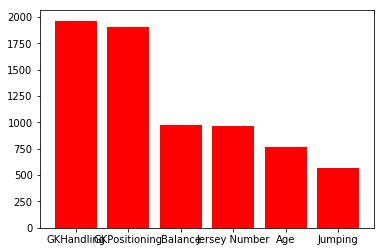

In [41]:
feat = []
for i in range(60, 66):
    feat.append(x.columns[ind[i]])

plt.figure()
plt.bar(feat, fitmod.scores_[ind[range(60, 66)]], color='r', align='center')

plt.show()

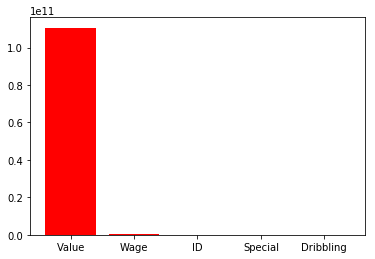

In [43]:
feat = []
for i in range(5):
    feat.append(x.columns[ind[i]])

plt.figure()
plt.bar(feat, fitmod.scores_[ind[range(5)]], color='r', align='center')

plt.show()